# Course 2: Project - Task F - Finding correlations

<a name="task-f-top"></a>
This notebook is concerned with task F.

**Goal:** Identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score.

**Contents:**
* [Imports](#task-f-imports)
* [Utilities](#task-f-utilities)
* [Data loading](#task-f-data-loading)
* [Finding correlations](#task-f-finding-correlations)

## Imports<a name="task-f-imports"></a> ([top](#task-f-top))
---

In [2]:
# Standard library:
import math
import pathlib
import typing as t

# 3rd party:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

# Project:
import utils

%matplotlib inline
register_matplotlib_converters()

## Data loading<a name="task-f-data-loading"></a> ([top](#task-f-top))
---

First, we load the entire cleaned-up dataset:

In [3]:
base_name = pathlib.Path.cwd().joinpath('en.openfoodfacts.org.products.clean')

As indicated, we restrict the data to 1000 rows and 5 columns of our choice:

In [4]:
# Load the data-types:
data_types, parse_dates = utils.load_and_amend_dtypes(base_name)

# Load the data-frame:
df = pd.read_csv(
    f'{base_name}.csv',
    header=0,
    parse_dates=parse_dates,
    dtype=data_types)

We look at the first few rows:

In [5]:
utils.display_with_options(utils.ALL_COLS)(df.head())

,code,url,creator,created_on_utc,last_modified_on_utc,product_name,quantity_number,quantity_unit,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_lat,first_packaging_code_lon,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,traces,traces_tags,traces_en,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,serving_number,serving_unit
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2016-09-17 09:17:46,2016-09-17 09:18:13,Farine de blé noir,1000.0,g,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:brands-completed,en:categories-to-be-comple...","en:brands-completed,en:categories-to-be-comple...","Brands completed,Categories to be completed,Ch...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:brands-to-be-completed,en:categories-to-be-...","en:brands-to-be-completed,en:categories-to-be-...","Brands to be completed,Categories to be comple...",NaN,N

## Finding correlations<a name="task-f-finding-correlations"></a> ([top](#task-f-top))
---

The first thing we want to do is to select a subset of the columns. We set the following guidelines:
* Exclude columns which are unrelated to nutrition.
* Ignore columns that correspond to fine-grained break-downs with few non-NA values.

Thus, we decide to limit ourselves to columns of the groups *Miscellaneous data* and *Nutrition facts*.

Turing to the Internet, we found out that the French nutrition score is a derivative of the UK nutrition score. We check, how correlated these are:

In [6]:
df[[
    'nutrition-score-fr_100g',
    'nutrition-score-uk_100g'
]].corr()

,nutrition-score-fr_100g,nutrition-score-uk_100g
nutrition-score-fr_100g,1.000000,0.978616
nutrition-score-uk_100g,0.978616,1.000000


**Comment:** As expected, these are almost perfectly correlated and we decide to focus on the French nutrition score.

Turning to the Internet, we also found out that salt is a chemical compound made up of sodium and chloride (there is even a [calculator](https://www.heartfoundation.org.au/healthy-eating/food-and-nutrition/salt/sodium-and-salt-converter). We check how correlated these are:

In [7]:
df[[
    'salt_100g',
    'sodium_100g'
]].corr()

,salt_100g,sodium_100g
salt_100g,1.0,1.0
sodium_100g,1.0,1.0


**Comment:** As expected, these are perfectly correlated and we decide to focus on sodium.

Turning to the Internet, we also found out that we roughly have the following hierarchy:
* Nutrients:
  * Macronutrients:
    * Fats:
      * Saturated
      * Trans
      * Unsaturated:
        * Monounsaturated
        * Polyunsaturated:
          * Omega-3
          * Omega-6
          * Omega-9
    * Carbohydrates:
      * Sugars (simple)
      * Starches (complex)
      * Fibers (complex)
      * Polyols (reduced-calorie carbohydrates)
    * Proteins:
      * Milk proteins:
        * Casein
        * Serum proteins
  * Micronutrients:
    * Vitamins
    * Minerals
* Other:
  * Cholesterol (lipoproteins, low-density lipoproteins (LDL) and high-density lipoproteins (HDL))
  * Nucleotides
  * Caffeine
  * Taurine

We break the columns into sub-groups to make the task more manageable:

In [8]:
#
# Additives and palm oil
#

cols_additives_and_palm = [
    'additives_n',
    'ingredients_from_palm_oil_n',
    'ingredients_that_may_be_from_palm_oil_n'
]

#
# Energy
#

cols_energy = [
    'energy_100g',
    'energy-from-fat_100g'
]
    
# 
# Macronutrients
#

cols_fats = [
    'fat_100g',
    'saturated-fat_100g',
    'monounsaturated-fat_100g',
    'polyunsaturated-fat_100g',
    'trans-fat_100g',
    'cholesterol_100g'
]

cols_carbohydrates = [
    'carbohydrates_100g',
    'sugars_100g',
    'starch_100g',
    'polyols_100g',
    'fiber_100g'
]
    
cols_proteins = [
    'proteins_100g',
    'casein_100g',
    'serum-proteins_100g',
    'nucleotides_100g'
]
    
#
# Micronutrients
#

cols_vitamins = [
    'vitamin-a_100g',
    'beta-carotene_100g',
    'vitamin-d_100g',
    'vitamin-e_100g',
    'vitamin-k_100g',
    'vitamin-c_100g',
    'vitamin-b1_100g',
    'vitamin-b2_100g',
    'vitamin-pp_100g',
    'vitamin-b6_100g',
    'vitamin-b9_100g',
    'folates_100g',  # close to vitamin b9
    'vitamin-b12_100g',
    'biotin_100g',  # vitamin b8
    'pantothenic-acid_100g',  # vitamin b5
]
    
cols_minerals = [
    'silica_100g',
    'bicarbonate_100g',
    'potassium_100g',
    'chloride_100g',
    'calcium_100g',
    'phosphorus_100g',
    'iron_100g',
    'magnesium_100g',
    'zinc_100g',
    'copper_100g',
    'manganese_100g',
    'fluoride_100g',
    'selenium_100g',
    'chromium_100g',
    'molybdenum_100g',
    'iodine_100g'
]

#
# Other remaining columns
#

cols_other = [
    'sodium_100g',
    'alcohol_100g',
    'caffeine_100g',
    'taurine_100g',
    'ph_100g',
    'fruits-vegetables-nuts_100g',
    'fruits-vegetables-nuts-estimate_100g',
    'collagen-meat-protein-ratio_100g',
    'cocoa_100g'
]

## Result

We prepare a couple of utility functions:

In [9]:
def categorize(coeff: float) -> str:
    """\
    If the coefficient is NA, returns NA. Otherwise, returns one of 'low', 'moderate' or 'high'.
    """
    if pd.isna(coeff):
        return coeff
    
    coeff = math.fabs(coeff)
    # The coefficient is in range [0, 1]:
    if 0 <= coeff < 0.3:
        return 'low'
    elif 0.3 <= coeff < 0.5:
        return 'moderate'
    else:  # 0.5 <= coeff <= 1.0
        return 'high'

    
def plot_heatmap(cols: t.List[str]) -> None:
    """\
    Computes correlation coefficients and display them as a heatmap.
    """
    corr_df = df[cols].corrwith(df['nutrition-score-fr_100g']).to_frame(name='corr-score-fr')
    
    # Compute the number of entries where the given column and the score columns were both not NA:
    nnotnas = []
    for col in cols:
        nnotna = (df[col].notna() & df['nutrition-score-fr_100g'].notna()).sum()
        nnotnas.append(nnotna)
    
    labels = pd.DataFrame(data=[
        f'{categorize(coeff)} [{coeff:.2f}] ({nnotna})' for coeff, nnotna in zip(corr_df['corr-score-fr'], nnotnas)
    ])
    
    fig, ax = plt.subplots(figsize=(5, len(cols) * 0.8))
    sns.heatmap(corr_df[['corr-score-fr']], annot=labels, fmt='', vmin=-1.0, vmax=1.0, cmap='coolwarm', ax=ax)
    plt.show()

**Reminder** The higher the nutrition score is, the less healthy the food product is deemed. I.e. a negative correlation will indicate a healthy nutrient while a positive correlation will indicate a less healthy ingredient. 

We start our analysis with the additives and palm oil:

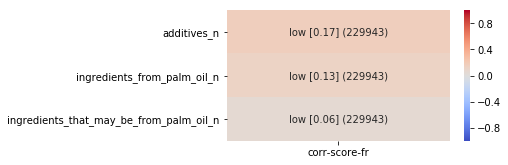

In [10]:
plot_heatmap(cols_additives_and_palm)

**Comment:** The nutrition score does not seem to be correlated with any of these variables.

We then turn to the energy:

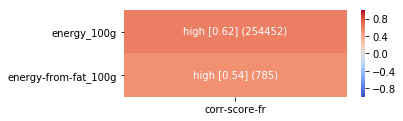

In [11]:
plot_heatmap(cols_energy)

**Comment:** The nutrition score seems to be strongly positively correlated with the amount of energy present in a food product.

We then turn to the fats:

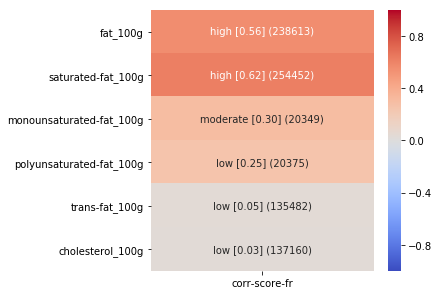

In [12]:
plot_heatmap(cols_fats)

**Comment:** Overall, the nutrition score seems to be strongly positively correlated with the total amount of fat. In more details, we see positive correlations ranging from strong to weak with the various types of fats as well as with cholesterol. We find the absence of a stong positive correlation with the amount of trans fat quite surprising.

We then turn to the carbohydrates:

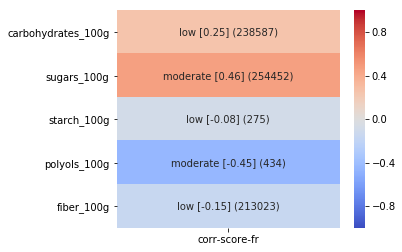

In [13]:
plot_heatmap(cols_carbohydrates)

**Comment:** Overall, the nutrition score seems to be weakly positively correlated with the total amount of carbohydrates. In more details, we see a moderate positive correlation with the amount of simple sugars and a negative correlations ranging from moderate to weak with the complex sugars as well as with the reduced-calorie carbohydrates.

We then turn to the proteins:

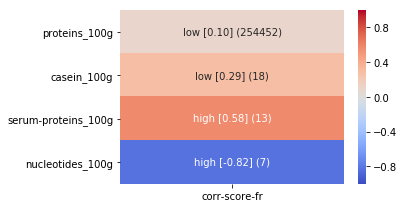

In [14]:
plot_heatmap(cols_proteins)

**Comment:** Overall, the nutrition score seems to be weakly positively correlated with the total amount of proteins and strongly negatively correlated with the amount of nucleotides. In more details, we see positive correlations ranging from strong to weak with the milk proteins.

We then turn to the vitamins:

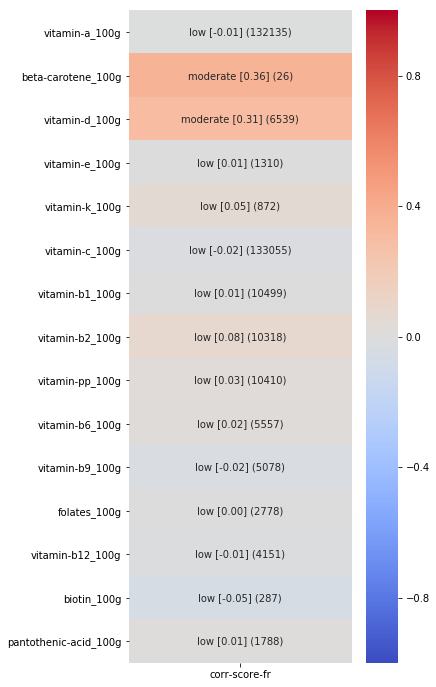

In [15]:
plot_heatmap(cols_vitamins)

**Comment:** Overall, the nutrition score seems to be moderately positively correlated with beta-carotene and vitamin-d and uncorrelated with the other vitamins.

We then turn to the minerals:

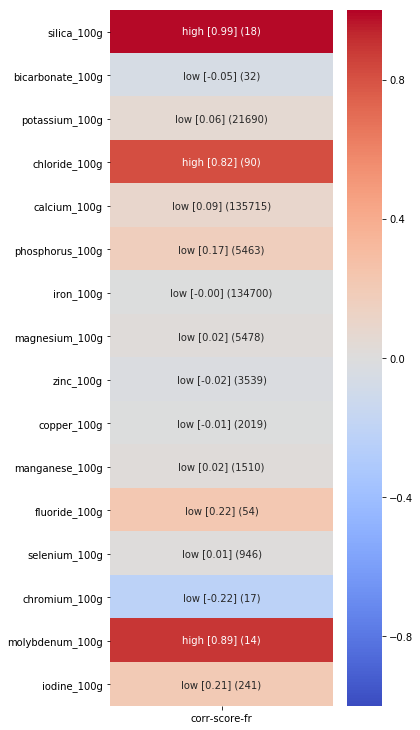

In [16]:
plot_heatmap(cols_minerals)

**Comment:** Overall, the nutrition score seems to be strongly positively correlated with silica, chloride and molybdenum and uncorrelated with the other minerals.

Finally, we turn to the other remaining columns:

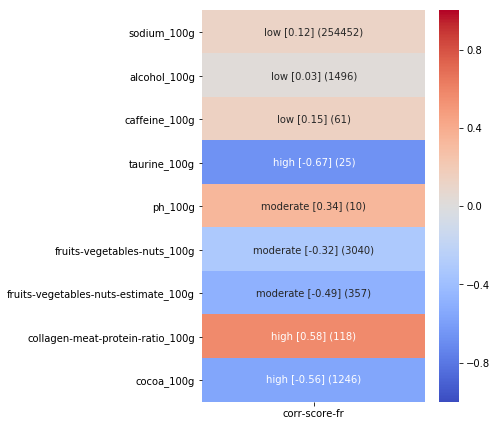

In [17]:
plot_heatmap(cols_other)

**Comment:** Overall, the nutrition score seems to be strongly positively correlated with the collagen-to-meat-protein ratio (i.e. food rich in low-quality meat get a worse score) and strongly to moderately negatively correlated with the amount of taurine, cocoa and fruits-vegetables-nuts (i.e. food rich in fruits, vegtables and nuts get a better score).